<a href="https://colab.research.google.com/github/SANGUNDE/ML-/blob/main/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [14]:
lat = df['longitude']
longi = df['latitude']

lat.head()

,longitude
0,-114.31
1,-114.47
2,-114.56
3,-114.57
4,-114.57


In [18]:
some_data = pd.concat([lat, longi],
                       axis=1)
some_data

,longitude,latitude
0,-114.31,34.19
1,-114.47,34.40
2,-114.56,33.69
3,-114.57,33.64
4,-114.57,33.57
...,...,...
16995,-124.26,40.58
16996,-124.27,40.69
16997,-124.30,41.84
16998,-124.30,41.80


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
fig =px.scatter(x=lat, y=longi)
fig.show()

In [33]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_data = std.fit_transform(some_data)

scaled_data = pd.DataFrame(std_data, columns=std.get_feature_names_out(some_data.columns))
scaled_data

,longitude,latitude
0,2.619365,-0.671520
1,2.539569,-0.573264
2,2.494683,-0.905463
3,2.489696,-0.928857
4,2.489696,-0.961609
...,...,...
16995,-2.342963,2.318265
16996,-2.347950,2.369733
16997,-2.362912,2.907801
16998,-2.362912,2.889085


In [34]:
from sklearn.cluster import KMeans



In [42]:
K = 5
kmeans = KMeans(n_clusters=K,
                       max_iter=100,
                       init='k-means++',
                       random_state=42,
                       n_init=10)

kmeans.fit(scaled_data)
scaled_data['labels'] = kmeans.labels_

scaled_data

,longitude,latitude,labels
0,2.619365,-0.671520,2
1,2.539569,-0.573264,2
2,2.494683,-0.905463,2
3,2.489696,-0.928857,2
4,2.489696,-0.961609,2
...,...,...,...
16995,-2.342963,2.318265,4
16996,-2.347950,2.369733,4
16997,-2.362912,2.907801,4
16998,-2.362912,2.889085,4


In [43]:
#visualise my data

fig = px.scatter(x=scaled_data['longitude'],
           y=scaled_data['latitude'],
           color=scaled_data['labels'])

fig.show()

In [66]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=15) #tweak the eps of your preference
dbscannde_data = dbscan.fit(scaled_data)

In [68]:
#visualise my data
scaled_data['dbscan_labels'] = dbscannde_data.labels_



fig = px.scatter(scaled_data,
                 x='longitude',
                 y='latitude',
                 color='dbscan_labels')

#fig.show()

In [69]:
scaled_data.head()

,longitude,latitude,labels,dbscan_labels
0,2.619365,-0.671520,2,-1
1,2.539569,-0.573264,2,-1
2,2.494683,-0.905463,2,-1
3,2.489696,-0.928857,2,-1
4,2.489696,-0.961609,2,-1


In [70]:
scaled_data['dbscan_labels'].value_counts()

,count
dbscan_labels,
1,7255
6,5622
0,1807
3,1064
9,292
-1,273
7,222
4,116
10,115


In [71]:
from sklearn.metrics import silhouette_score as ss

In [72]:
ss(scaled_data.drop('labels', axis=1), scaled_data['labels'])

np.float64(0.7321061408973428)

In [73]:
media = df['median_income']

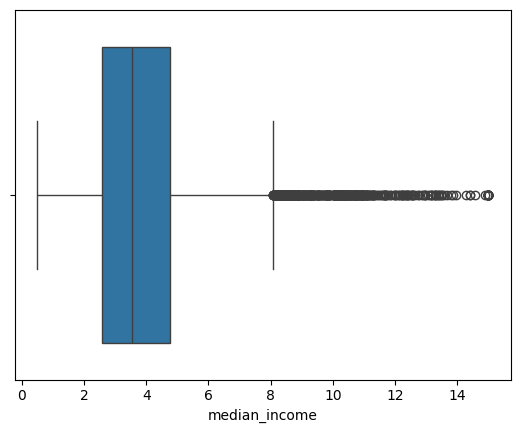

In [76]:
def graphing ( media ):
  sns.boxplot(x=media)
  plt.show()

graphing(media)

In [78]:
#removing the outliers
Q1 = media.quantile(0.25)
Q3 = media.quantile(0.75)
IQR = Q3 - Q1

media = media[(media >= Q1 -1.5 * IQR )& (media <= Q3 + 1.5 * IQR)]

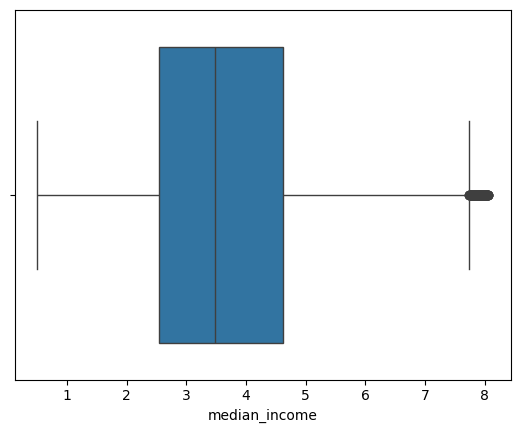

In [79]:
graphing(media)